# Prediction using Supervised ML

## Pranav Mandani

In [1]:
#IMPORT LIBRARY

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## READING DATA FROM GOOGLE-SHEET

In [3]:
sheet_id= "1rFlzvFaTZGKYgQtIPcb9FK-DW0k7IDdyteFIcfNf_HY"
sheet_name="Sheet5"

In [4]:
gsheet_url="https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(sheet_id,sheet_name)
df=pd.read_csv(gsheet_url)

In [5]:
# df=pd.read_csv(gsheet_url)

In [6]:
print("Data Imported Successfully")
df

Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
#print first 5 rows in dataset

In [8]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### check is null values in dataset

In [9]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### plot scatterplot bet hours and scores using seaborn and pyplot

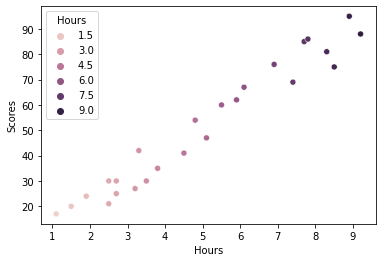

In [10]:
sns.scatterplot(x="Hours",y="Scores",data=df,hue="Hours")
plt.show()

In [11]:
#Score column assign to x
#Hours column assign to y


In [12]:
x=df.drop("Scores",axis="columns")
y=df.drop("Hours",axis="columns")

# spiliting data set


In [13]:
from sklearn.model_selection import train_test_split


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0)

In [15]:
# 20 percent data divide into testing set and rest data to the training set

In [16]:
x_train.head()

,Hours
22,3.8
17,1.9
24,7.8
23,6.9
14,1.1


In [17]:
y_train.head()

,Scores
22,35
17,24
24,86
23,76
14,17


In [18]:
y_test.head()

,Scores
5,20
2,27
19,69
16,30
11,62


In [19]:
#training the algorithm

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr=LinearRegression()

In [22]:
lr.fit(x_train,y_train)

LinearRegression()

# plotting regression line

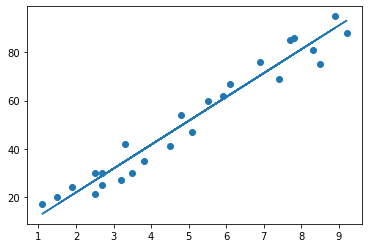

In [23]:
line = lr.coef_*x+lr.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [24]:
y_pred=lr.predict(x_test)

In [25]:
y_test.head()

,Scores
5,20
2,27
19,69
16,30
11,62


In [26]:
y_pred[0:5]

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

### finding mean squared error

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
print('Mean squared Error:', 
      mean_squared_error(y_test,y_pred))

Mean squared Error: 21.5987693072174


### finding mean absolute error

In [29]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [30]:
#if student study 9.25hrs/day

In [31]:
hours=9.25
test=np.array([hours])
test=test.reshape(-1,1)
own_pred=lr.predict(test)
print(own_pred)

[[93.69173249]]


In [32]:
#if student study 9.25 hrs/day then he scores 93.69 marks